<style type="text/css">
.reveal h1 {
    font-size: 2em;
}
</style>

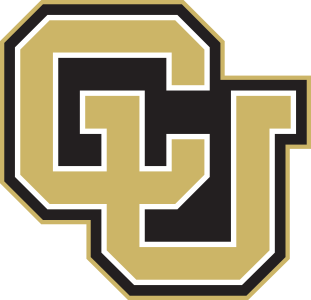

# Lecture 5, hands-on: regression examples in Python
*(CPBS 7602: Introduction to Big Data in the Biomedical Sciences)*

By __Lauren Vanderlinden__ and __Milton Pividori__<br>Department of Biomedical Informatics<br>University of Colorado Anschutz Medical Campus

# Data setup
- Make sure your environment has the following packages:
  - `pandas`
  - `numpy`
  - `matplotlib`
  - `seaborn`
  - `statsmodels`
- Download these files and place them somewhere (`/tmp/` folder used below):
  - `fungalToxin.txt` from [this link](https://www.dropbox.com/scl/fi/bgmgs5vdgrhbh0fjby5al/fungalToxin.txt?rlkey=33vonkio1v3xjve1jk3ynkxmk&st=hk0h4fmj&dl=0).
  - `AgeWould_Train.csv` from [this link](https://www.dropbox.com/scl/fi/zkv7ff955uf5t7cz6mvs5/AgeWould_Train.csv?rlkey=oh8ts8rr3mu96gf3mw9tp0uii&st=q0yuiyxz&dl=0).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit

# Set plotting style
sns.set()

# Location of data files
# change if needed
wd = "/tmp/"

## Simple Linear Regression

**Nut Fungus Example**

A drug precursor molecule is extracted from a type of nut. The nuts are commonly contaminated by a fungal toxin that is difficult to remove during the purification process. We suspect that the amount of fungus (and hence toxin) depends on the rainfall at the growing site. We would like to predict toxin concentration from rainfall in order to judge whether it would be worth paying additional rental charges for relatively drier sites. We analyze the toxin content in a series of batches of nuts and we know the rainfall at the growing sites during the four months when the nuts are forming.

**rainfall** is measured in centimeters per week and **toxin** is measured in micrograms per 100 grams of nut.

In [2]:
toxin = pd.read_csv(f"{wd}fungalToxin.txt", sep="\t")

In [3]:
toxin

rain  noon_temp  sunshine  wind_speed  toxin
0  1.30       20.9      6.23        13.3   18.1
1  2.28       25.4      8.13        10.8   28.6
2  1.11       28.2     10.21        10.9   15.9
3  0.74       23.7      6.96         8.2   19.2
4  1.32       26.5      9.04         9.8   19.3
5  0.51       23.9      7.84        12.3   14.8
6  1.56       26.7      6.69        10.0   21.7
7  1.32       30.0      8.30        12.2   16.5
8  2.05       24.9      9.22        10.7   23.8
9  1.37       22.0      8.37        15.0   19.0

In [4]:
# Display a table of only the rainfall and toxin levels
toxin[["rain", "toxin"]]

rain  toxin
0  1.30   18.1
1  2.28   28.6
2  1.11   15.9
3  0.74   19.2
4  1.32   19.3
5  0.51   14.8
6  1.56   21.7
7  1.32   16.5
8  2.05   23.8
9  1.37   19.0

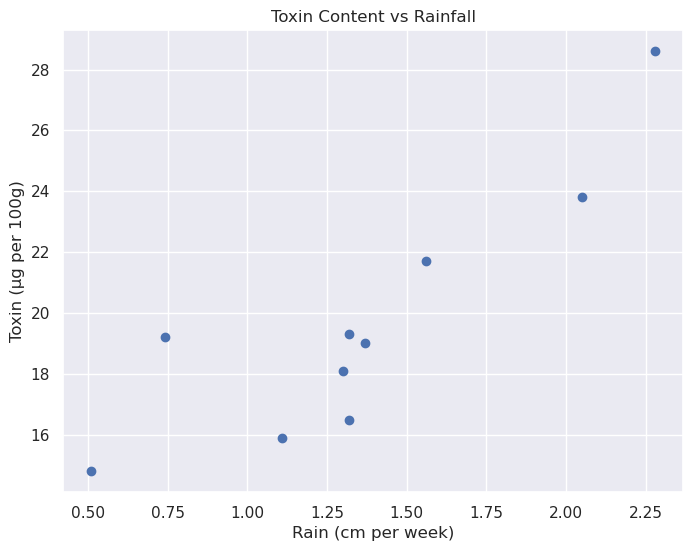

In [5]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(toxin["rain"], toxin["toxin"])
plt.xlabel("Rain (cm per week)")
plt.ylabel("Toxin (μg per 100g)")
plt.title("Toxin Content vs Rainfall")
plt.show()

In [6]:
# Fit simple linear regression model
# Using statsmodels formula API (similar to R's lm)
simple_regression = ols("toxin ~ rain", data=toxin).fit()
print(simple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  toxin   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     24.61
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00111
Time:                        17:40:11   Log-Likelihood:                -20.775
No. Observations:                  10   AIC:                             45.55
Df Residuals:                       8   BIC:                             46.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5697      1.961      5.390      0.0

/home/miltondp/software/miniconda3/envs/cu-cpbs-7602/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


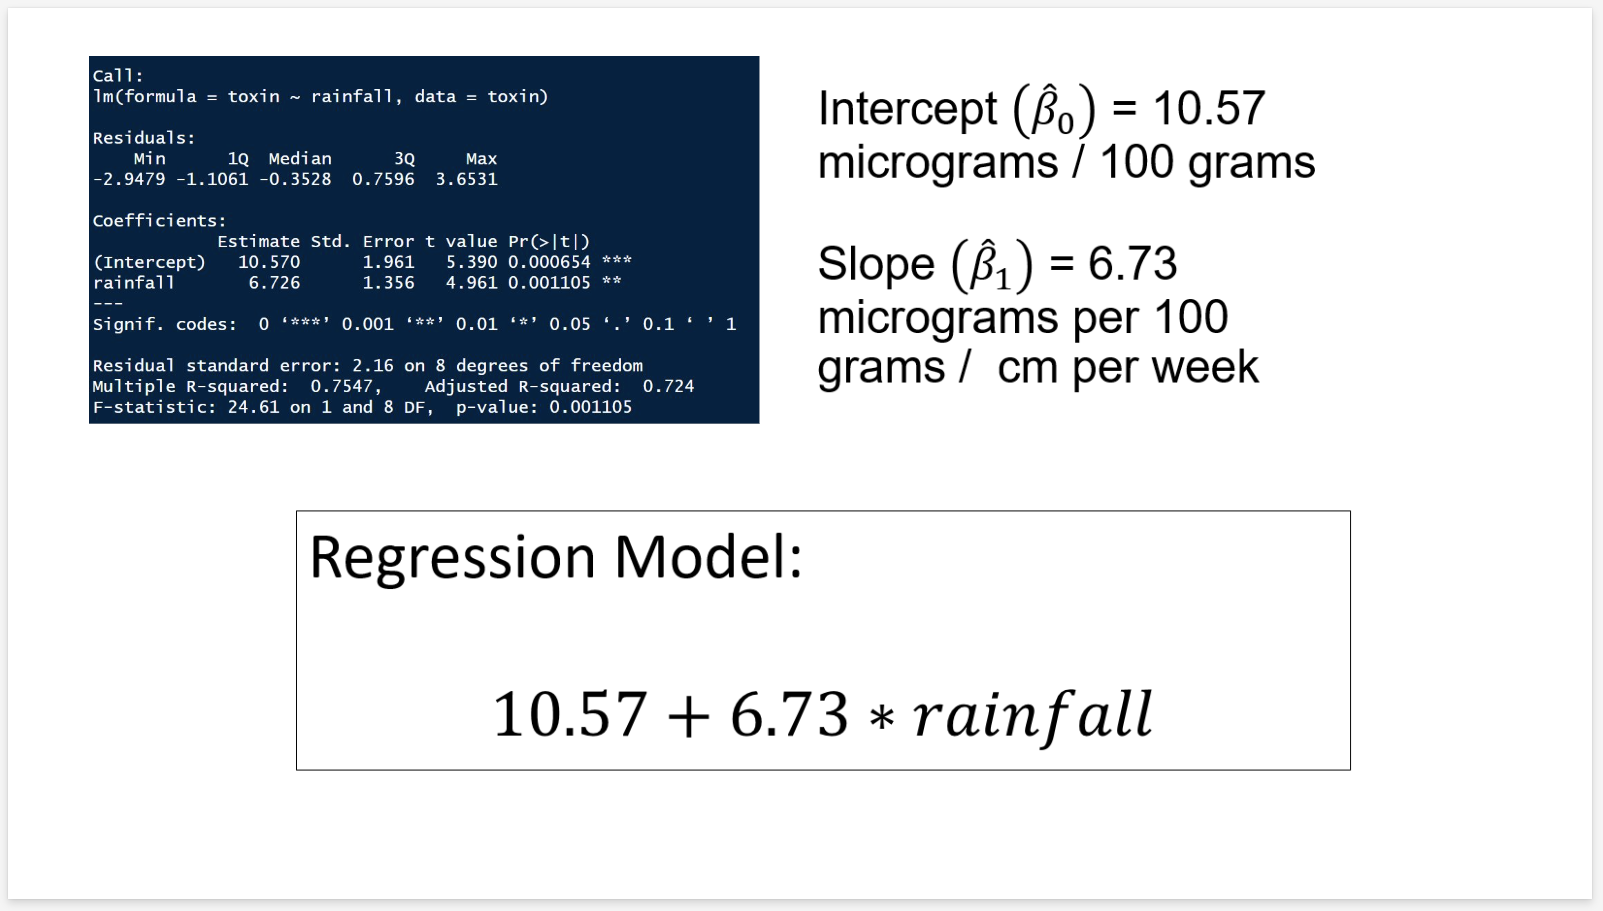

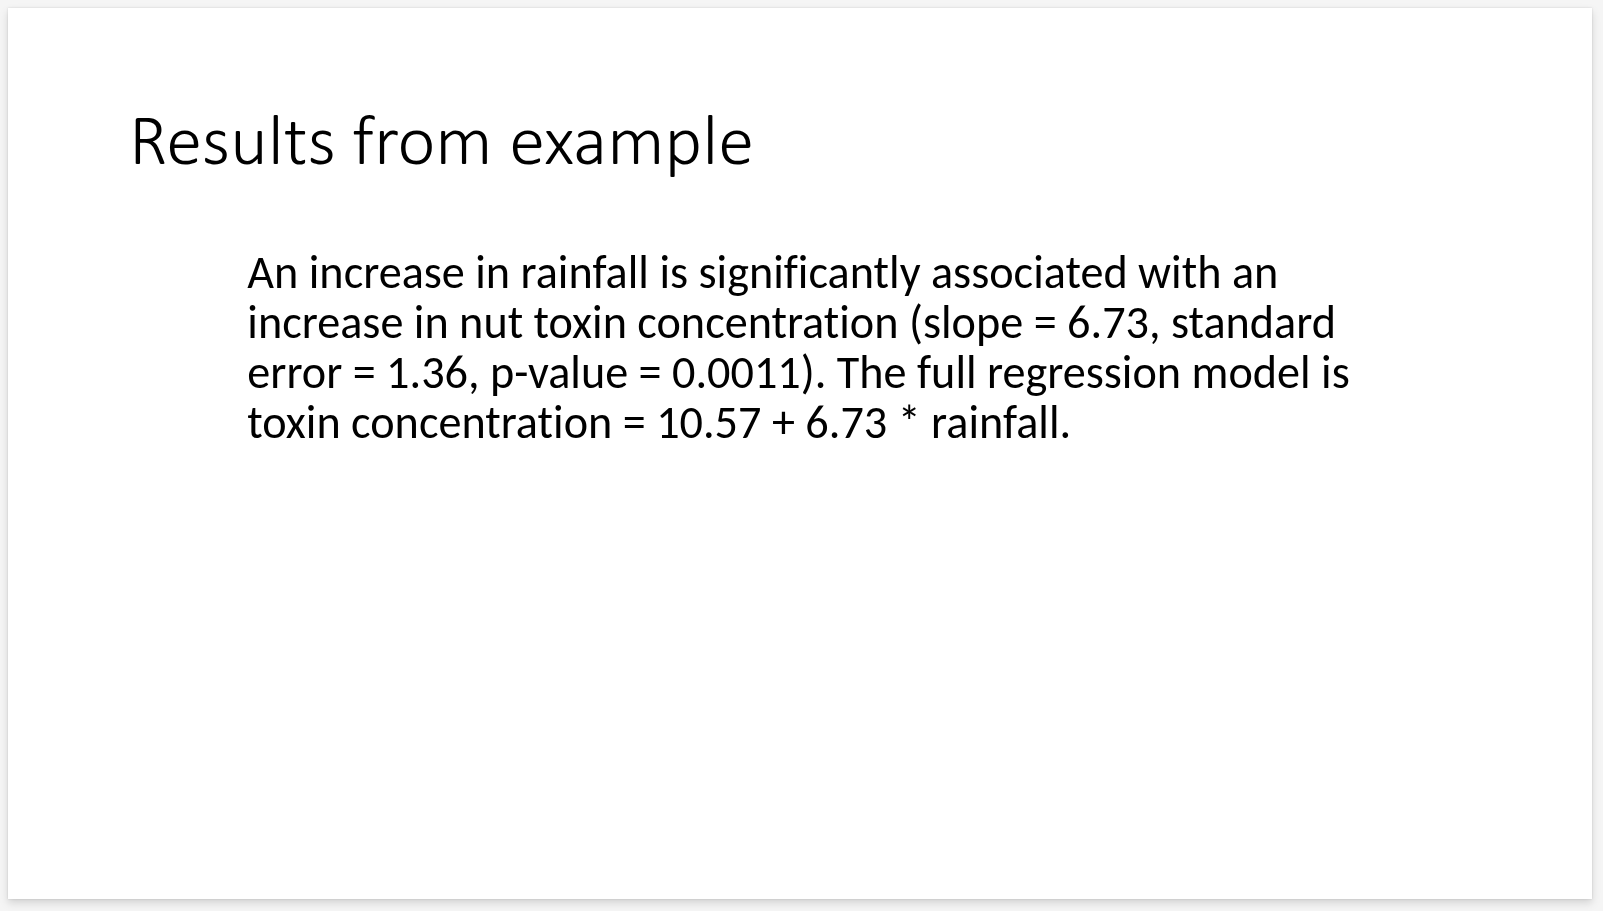

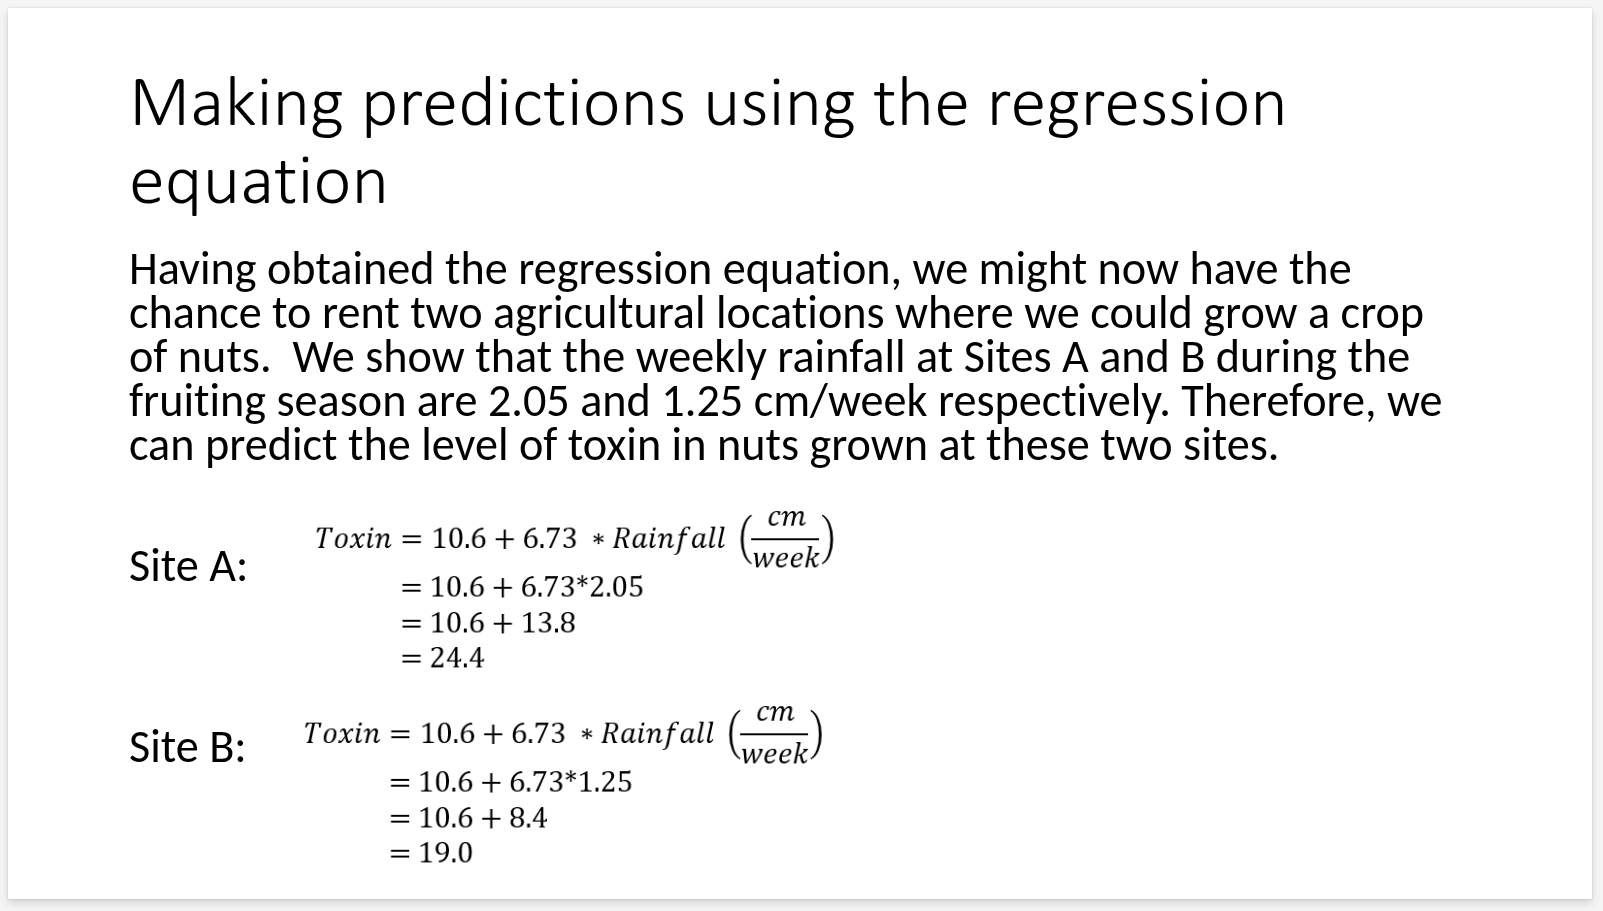

## Multiple Linear Regression

Let's consider having now 4 potential predictors of concentration of fungal toxin in nuts (μg per 100g).
1. rain - average amount of rainfall in cm per week
2. noon_temp - average temperature (degrees Celsius) at noon
3. sunshine - average number of hours per day of sunshine
4. wind_speed - average wind speed in km per hour

In [7]:
# Display table with all variables
toxin

rain  noon_temp  sunshine  wind_speed  toxin
0  1.30       20.9      6.23        13.3   18.1
1  2.28       25.4      8.13        10.8   28.6
2  1.11       28.2     10.21        10.9   15.9
3  0.74       23.7      6.96         8.2   19.2
4  1.32       26.5      9.04         9.8   19.3
5  0.51       23.9      7.84        12.3   14.8
6  1.56       26.7      6.69        10.0   21.7
7  1.32       30.0      8.30        12.2   16.5
8  2.05       24.9      9.22        10.7   23.8
9  1.37       22.0      8.37        15.0   19.0

In [8]:
# Fit multiple linear regression model
multiple_regression = ols(
    "toxin ~ rain + noon_temp + sunshine + wind_speed", data=toxin
).fit()
print(multiple_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  toxin   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     14.11
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00623
Time:                        17:40:35   Log-Likelihood:                -15.260
No. Observations:                  10   AIC:                             40.52
Df Residuals:                       5   BIC:                             42.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.6084      7.105      4.449      0.0

/home/miltondp/software/miniconda3/envs/cu-cpbs-7602/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


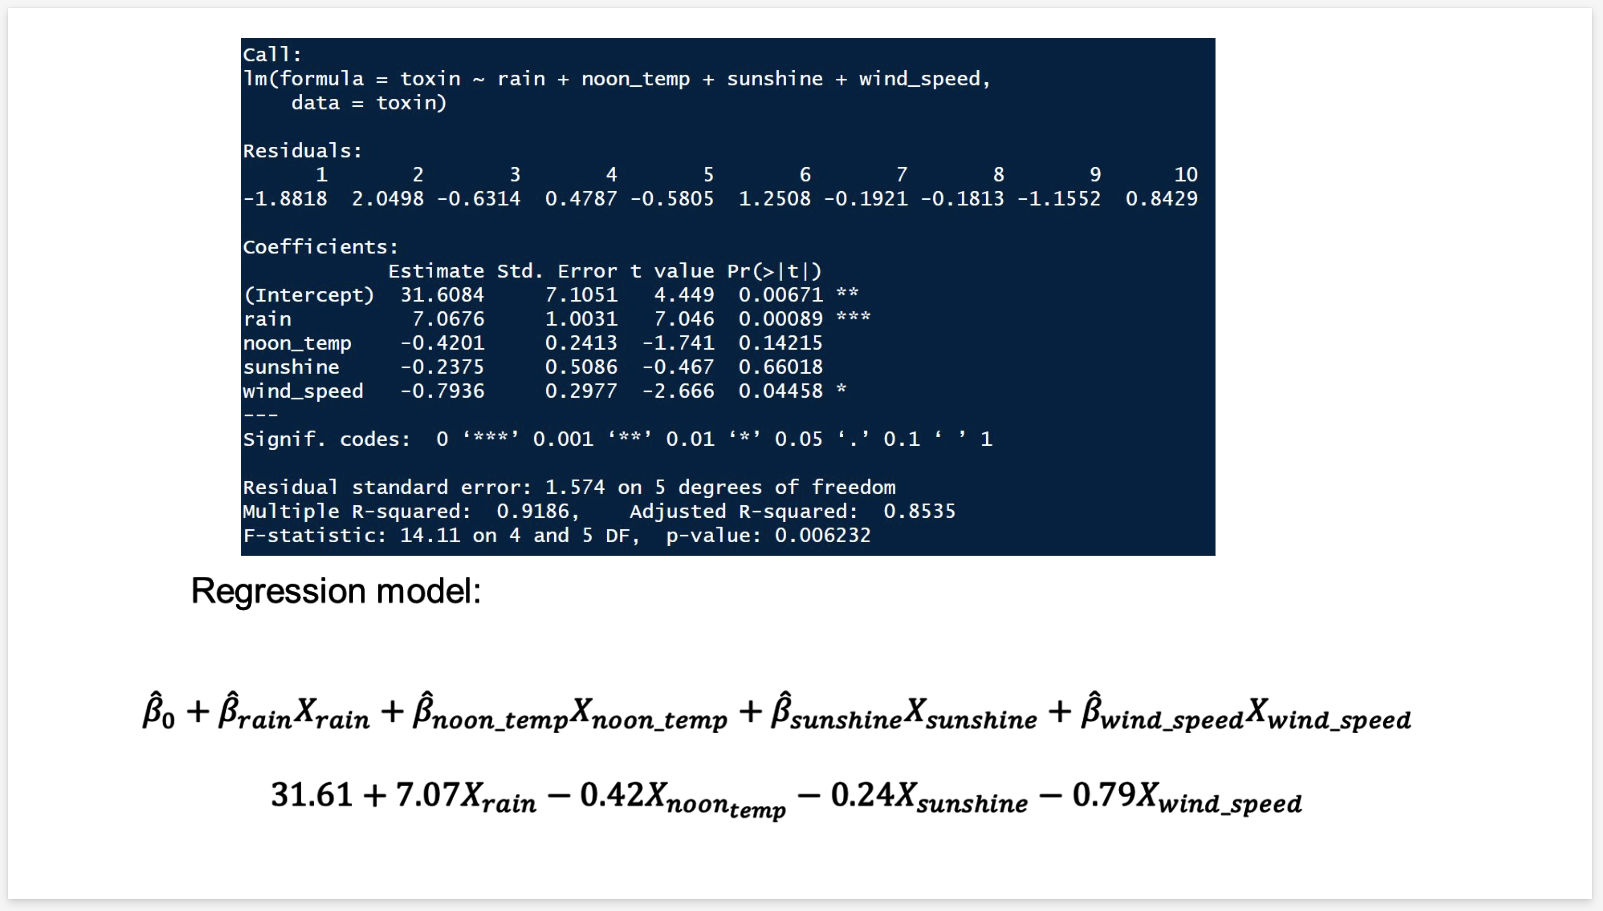

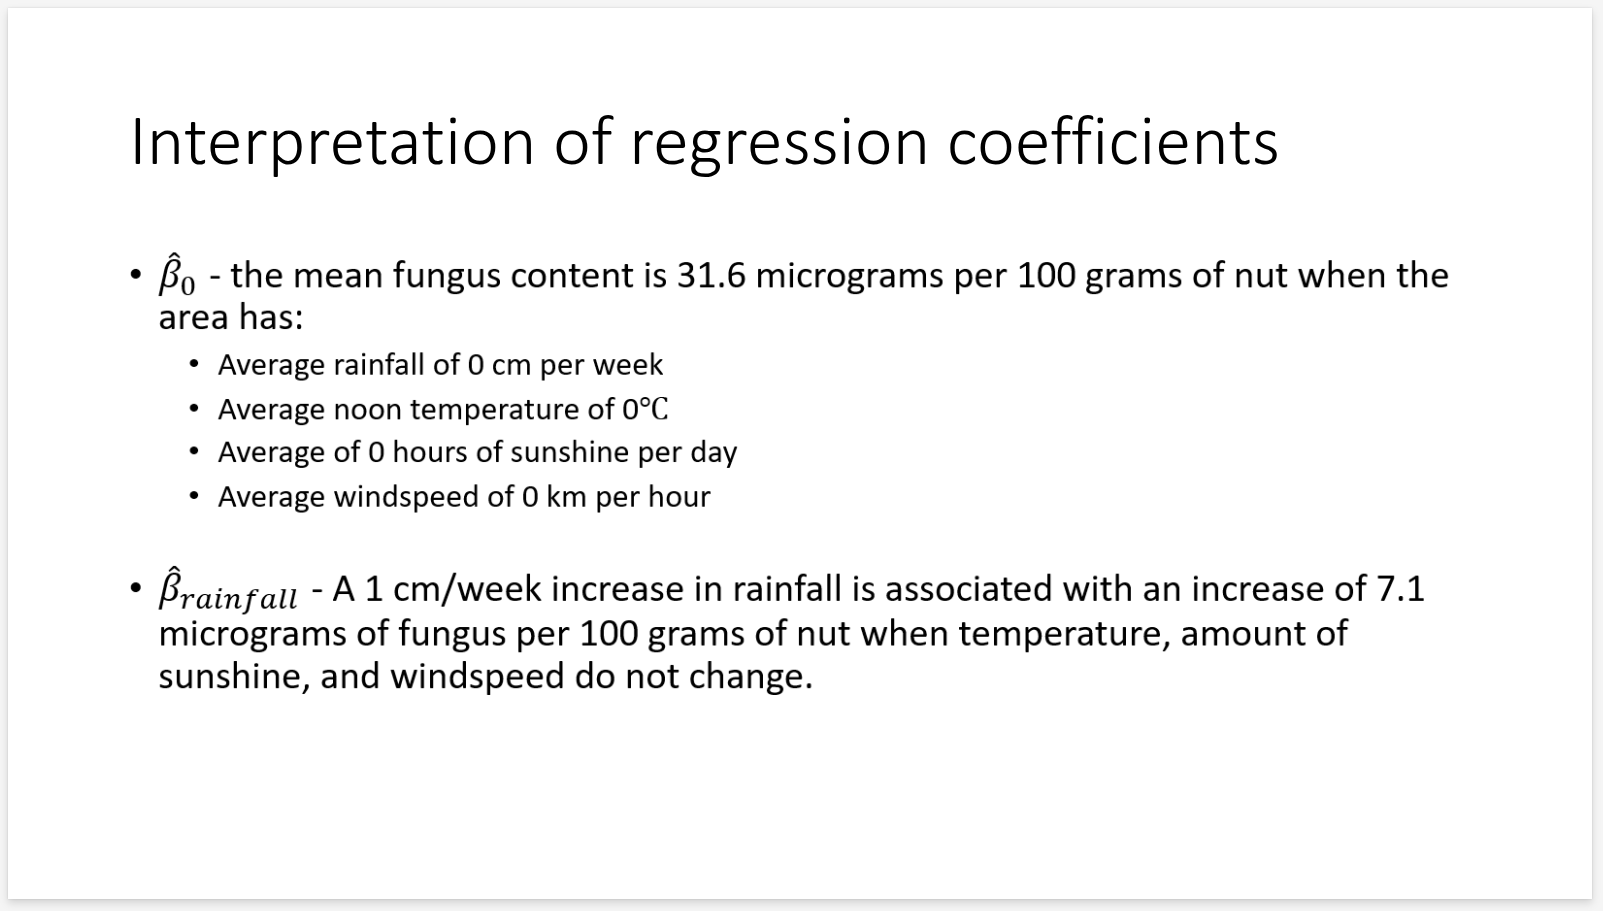

## Model fit in Multiple Regression

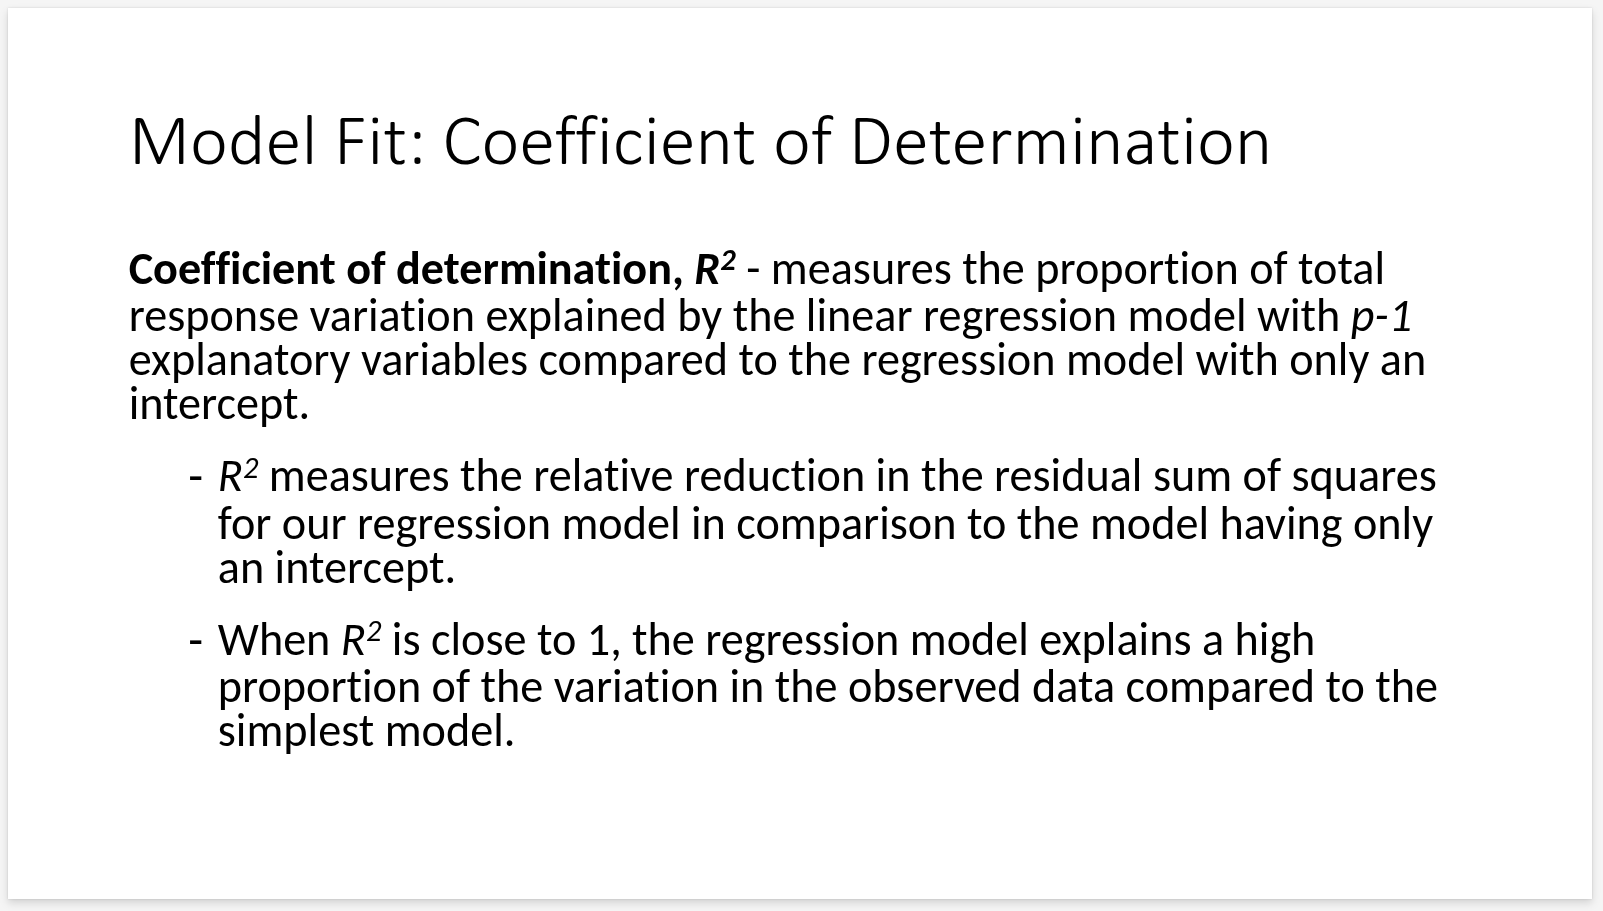

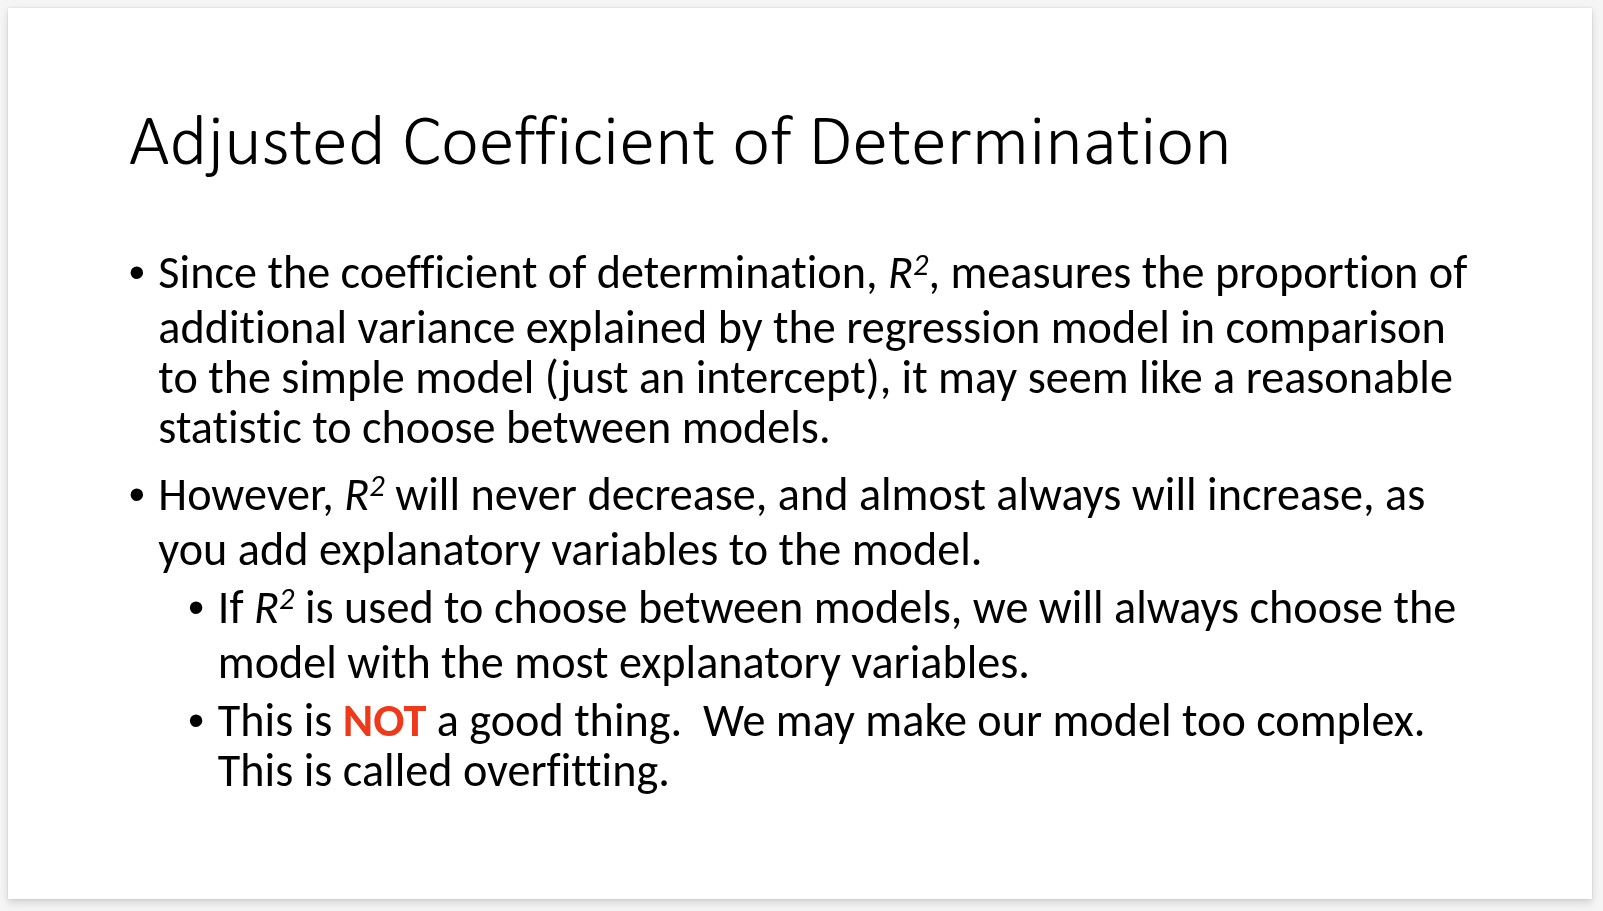

## Multiple Regression with Interaction

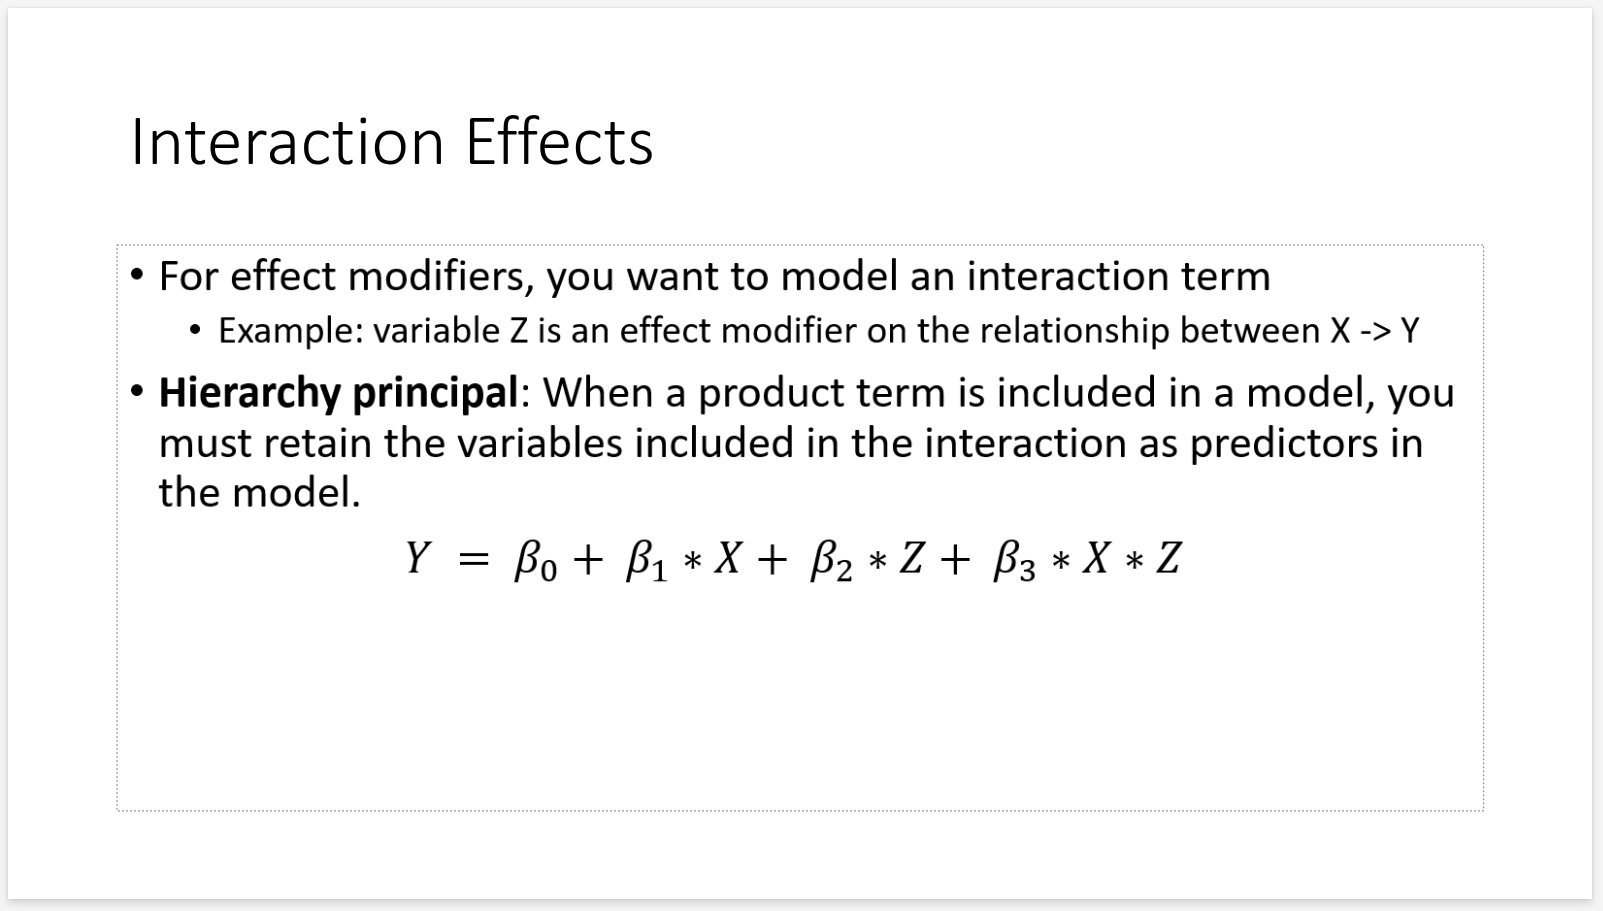

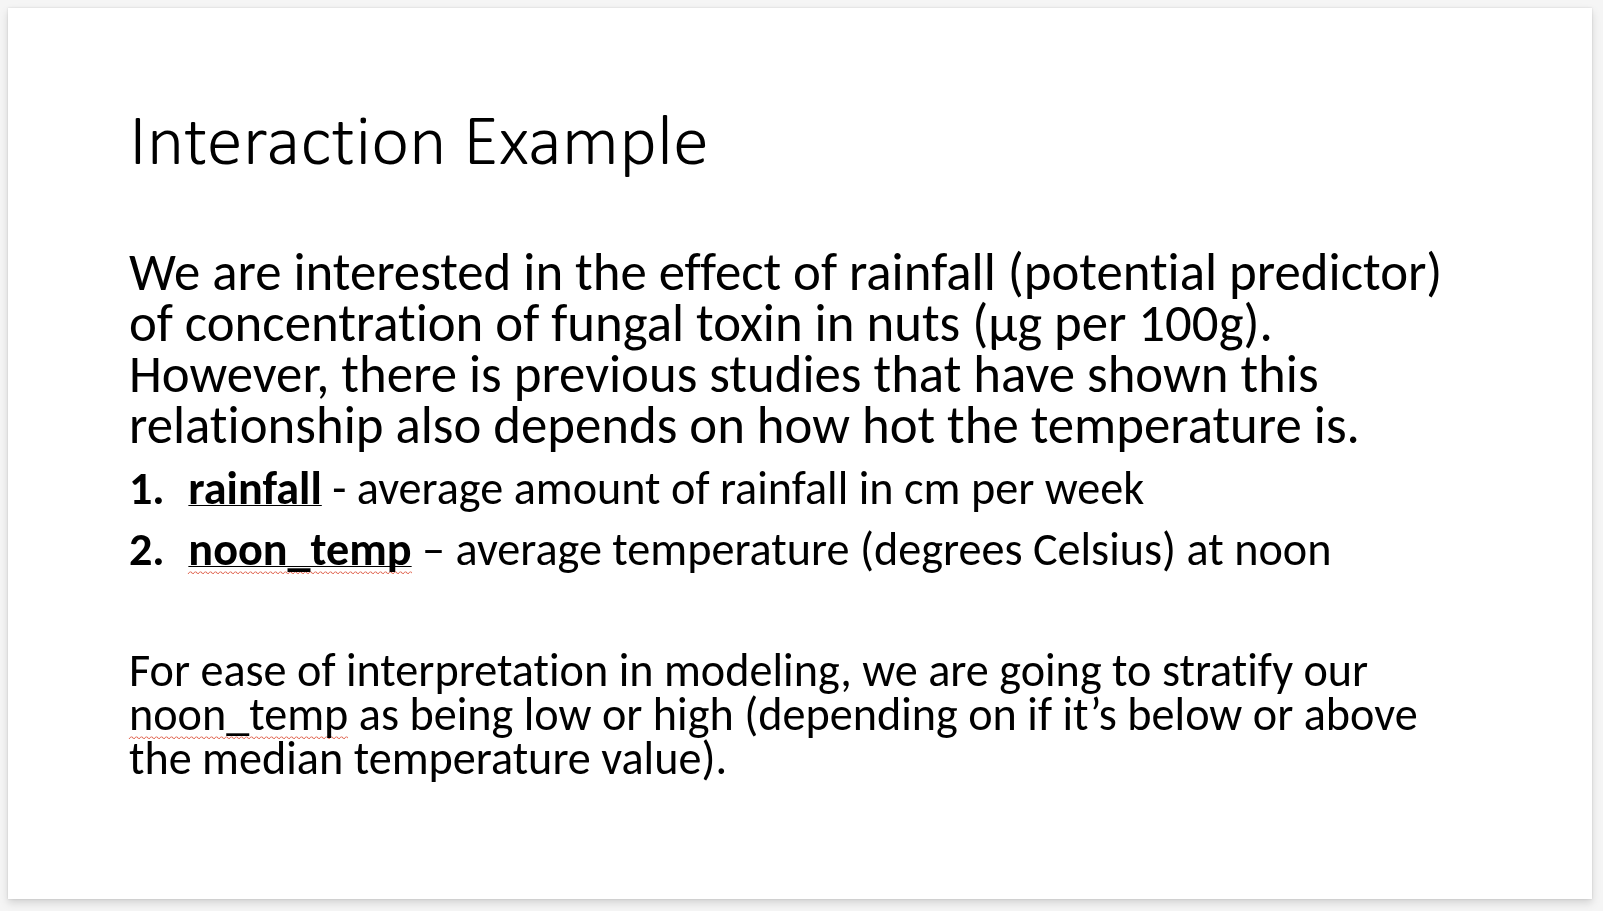

Say we have some prior information that the effect of rainfall on toxin levels is dependent on the temperature (as measured at noon time).  We would put this into the model as an interaction term between rainfall and the noon temperature.

In [9]:
# Create binary temperature variable
toxin["temp_binary"] = (toxin["noon_temp"] > toxin["noon_temp"].median()).astype(int)

# Fit interaction regression model
# Using * for interaction (similar to R)
interaction_regression = ols("toxin ~ rain * temp_binary", data=toxin).fit()
print(interaction_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  toxin   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     18.96
Date:                Mon, 03 Nov 2025   Prob (F-statistic):            0.00183
Time:                        17:41:25   Log-Likelihood:                -16.054
No. Observations:                  10   AIC:                             40.11
Df Residuals:                       6   BIC:                             41.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.3802      1.693  

/home/miltondp/software/miniconda3/envs/cu-cpbs-7602/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


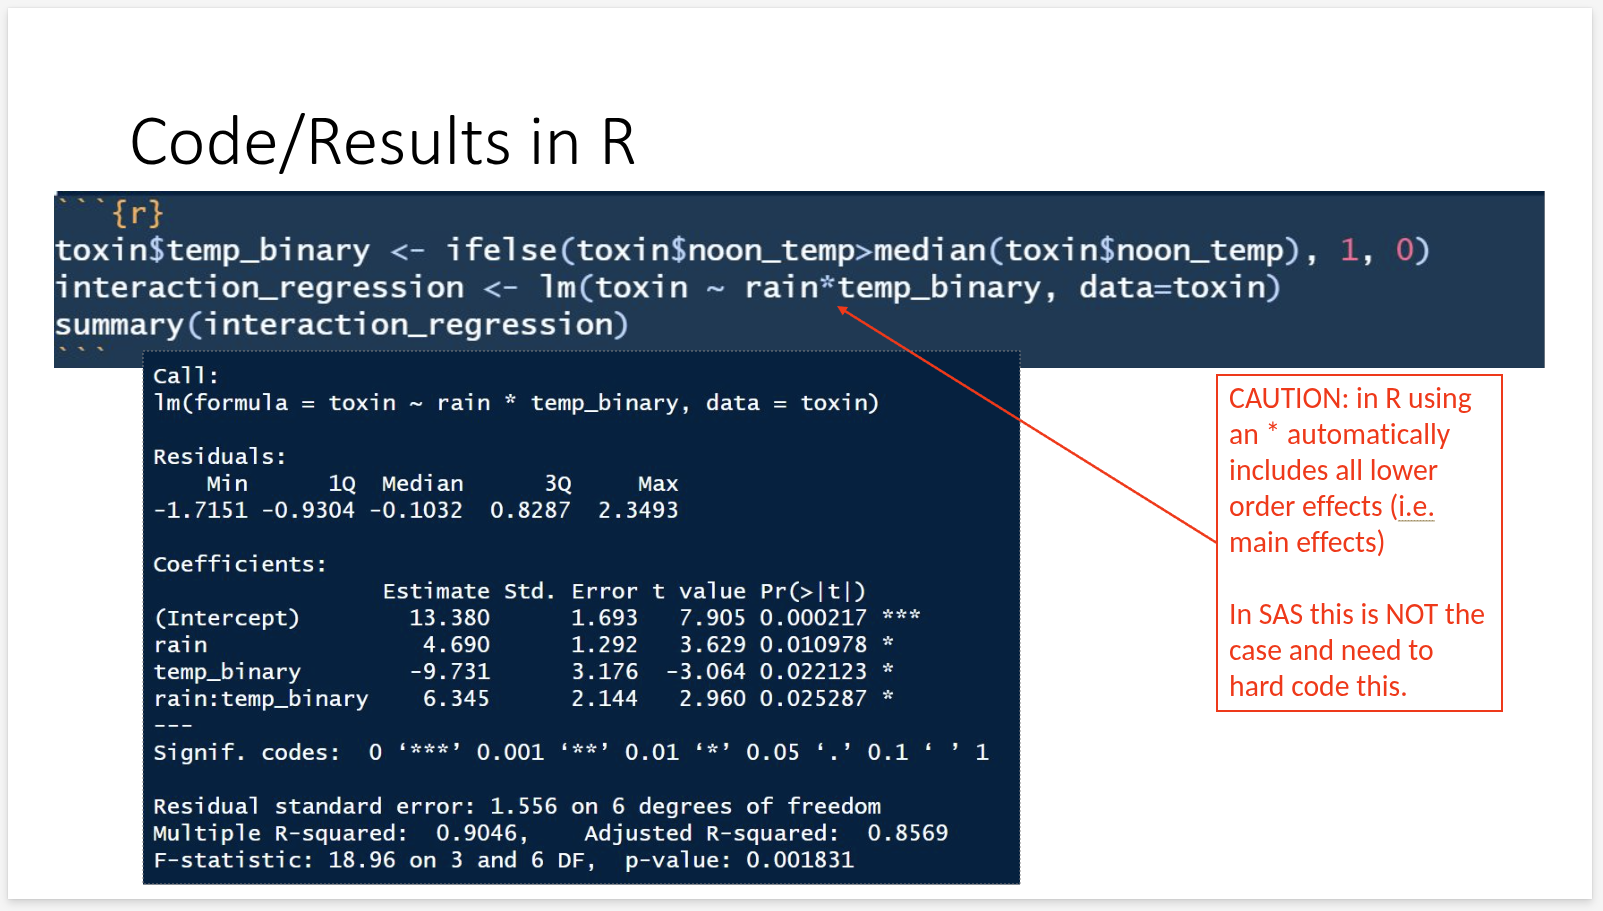

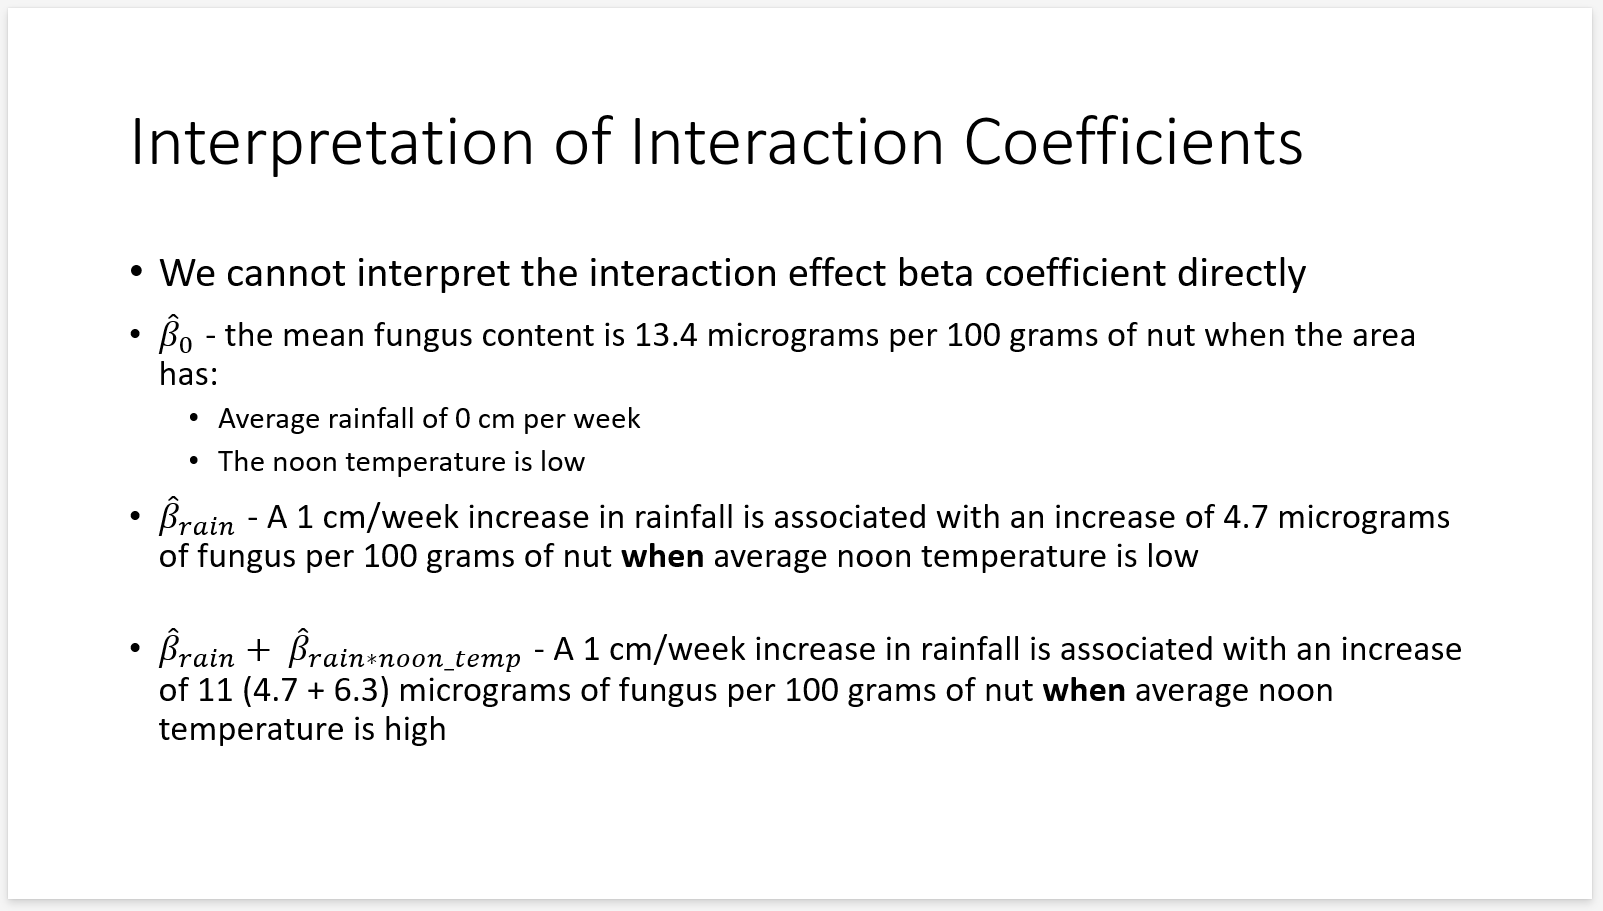

## Logistic Regression

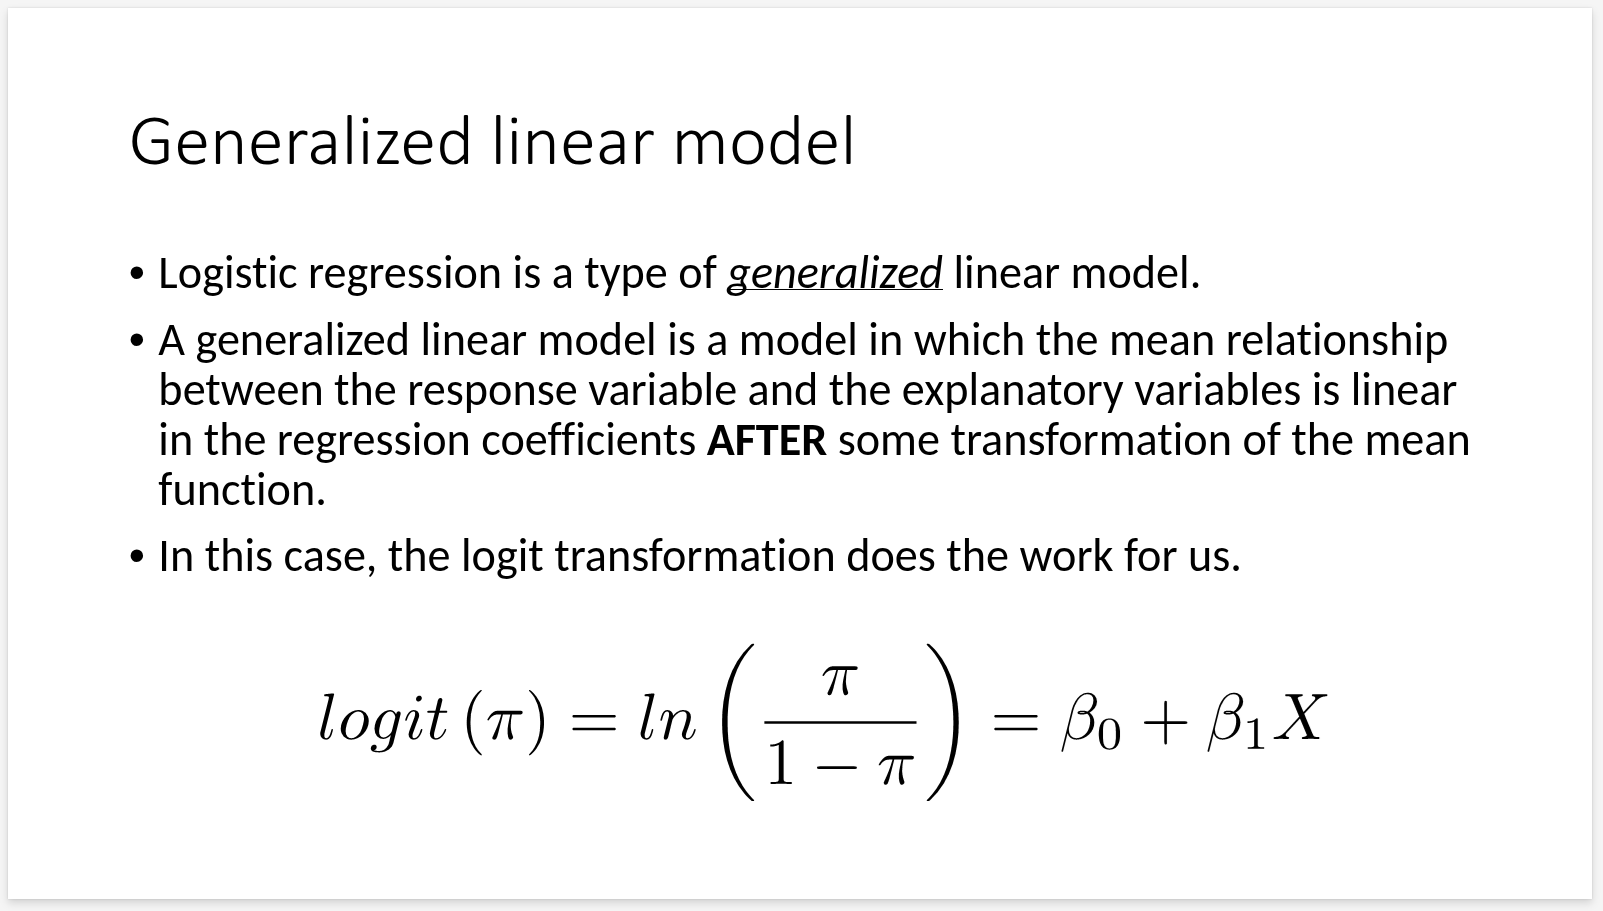

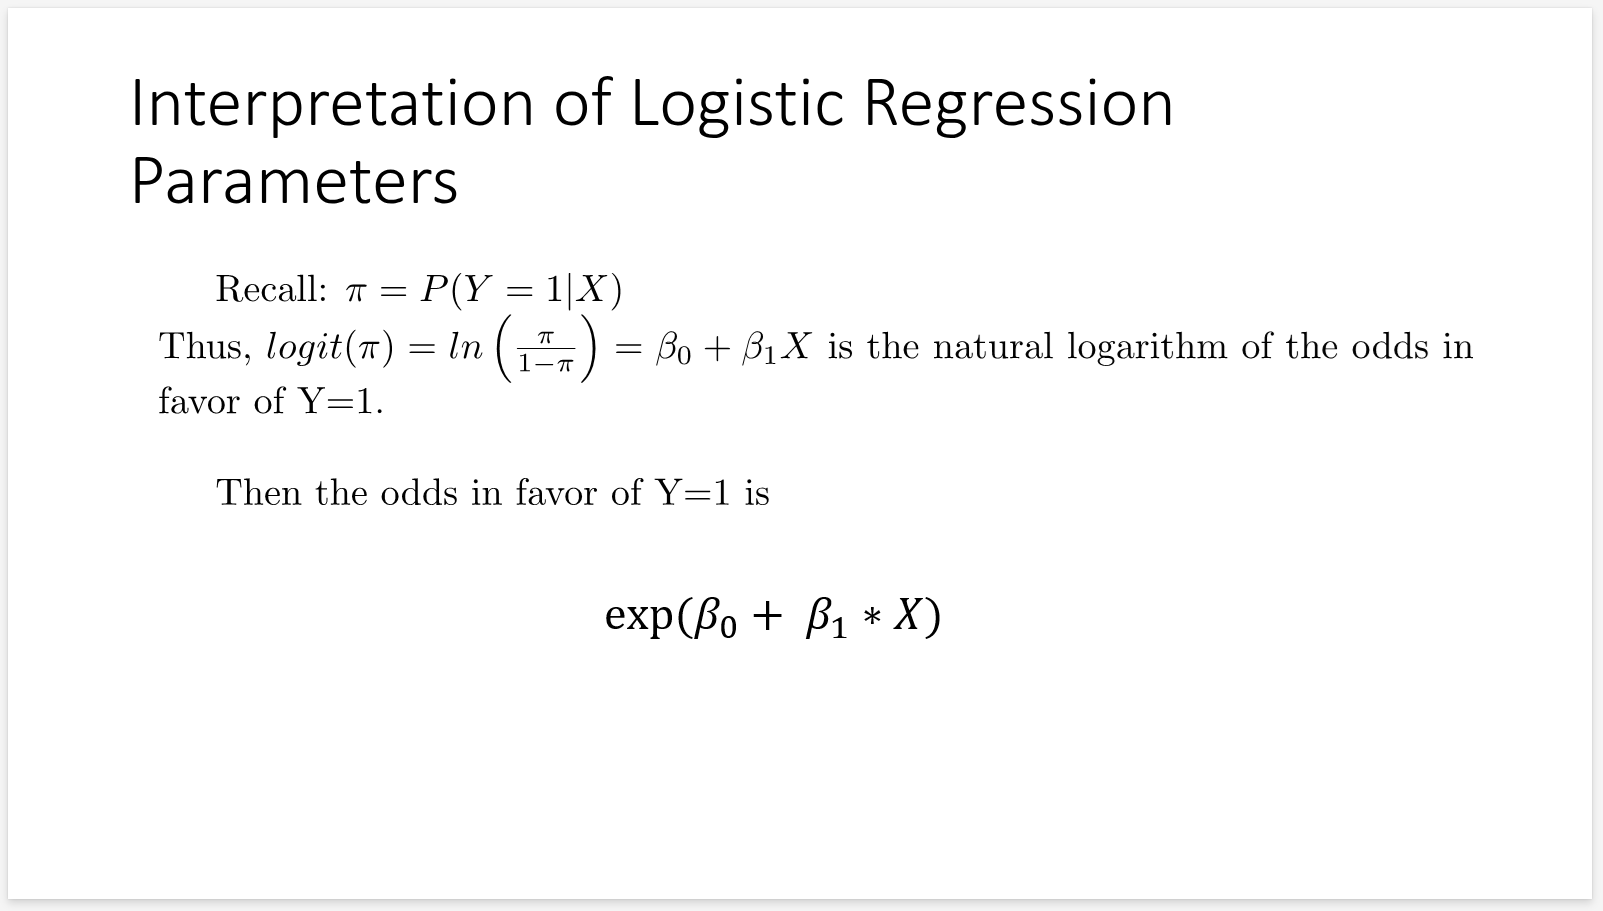

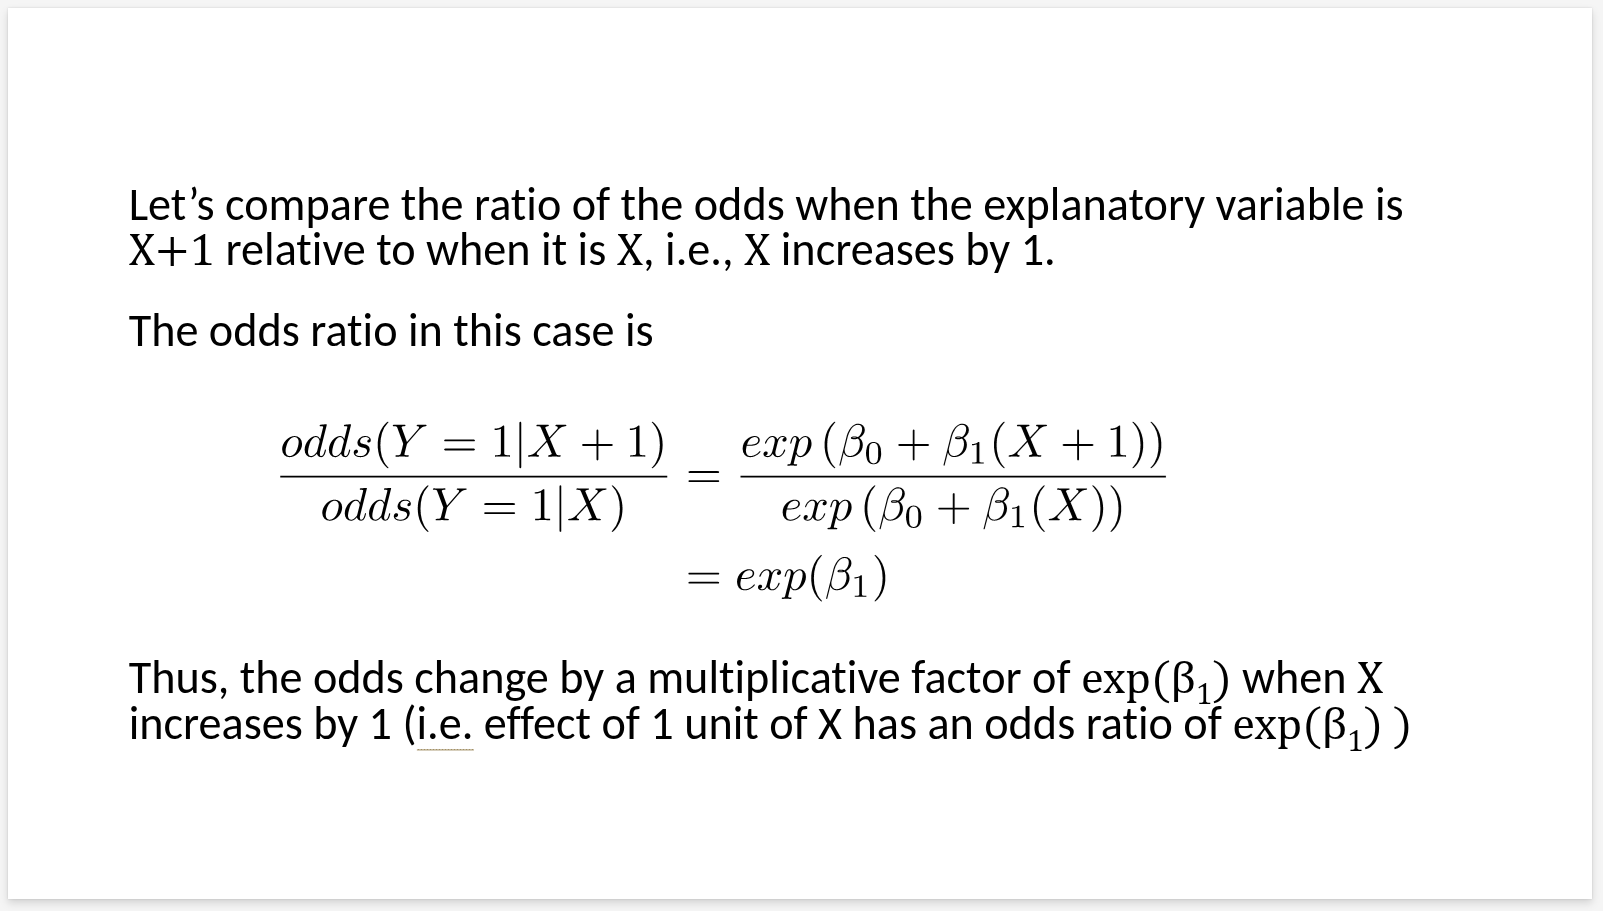

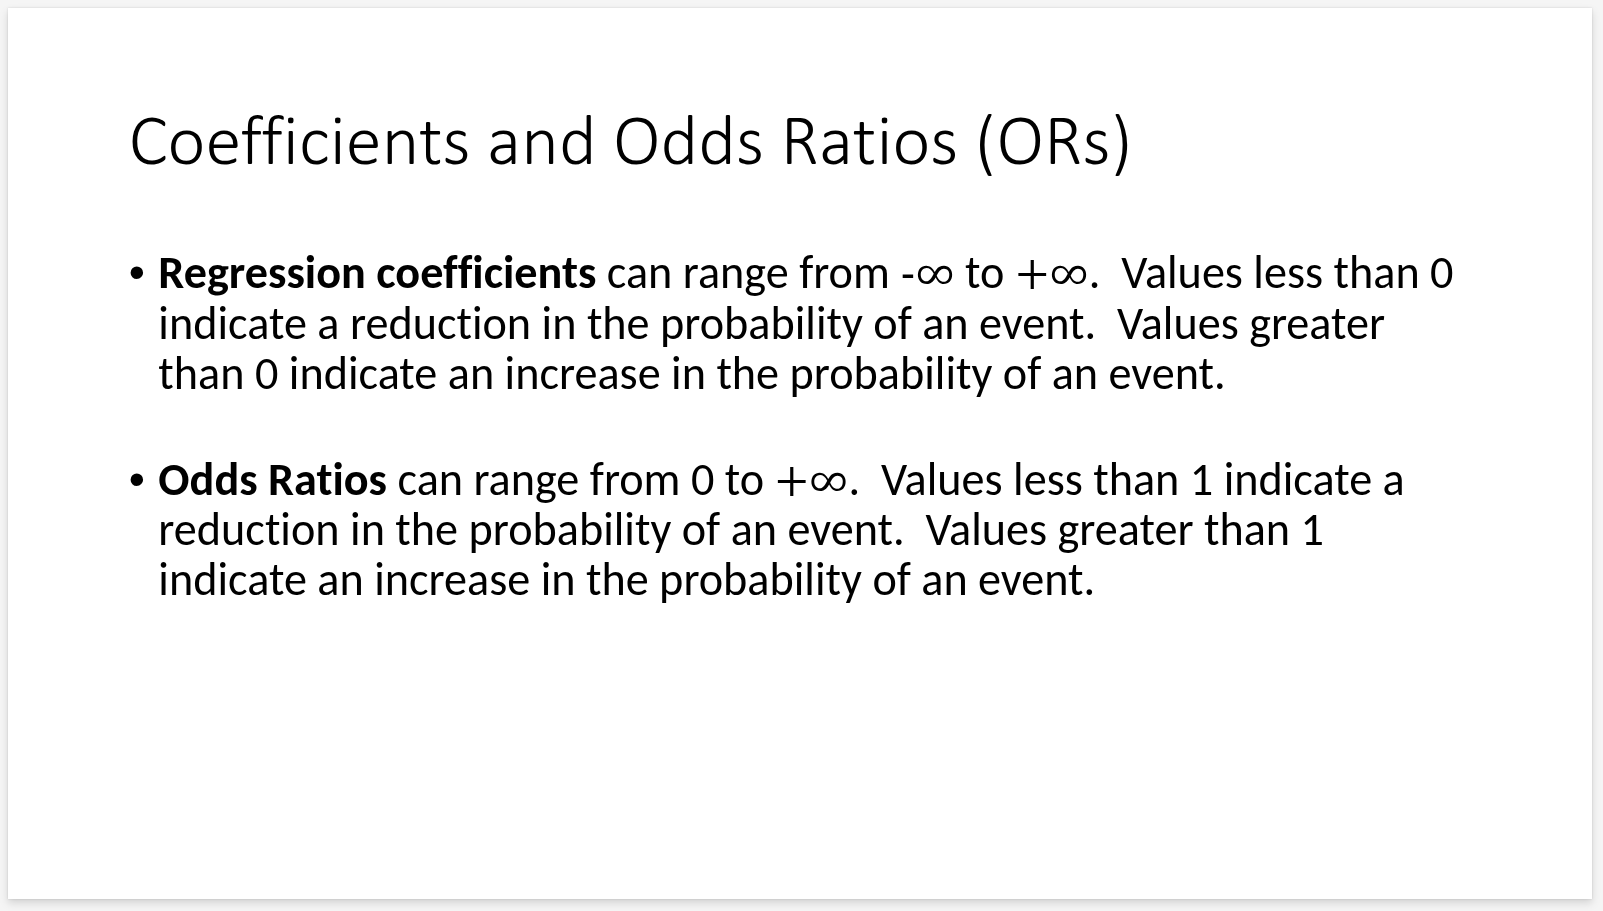

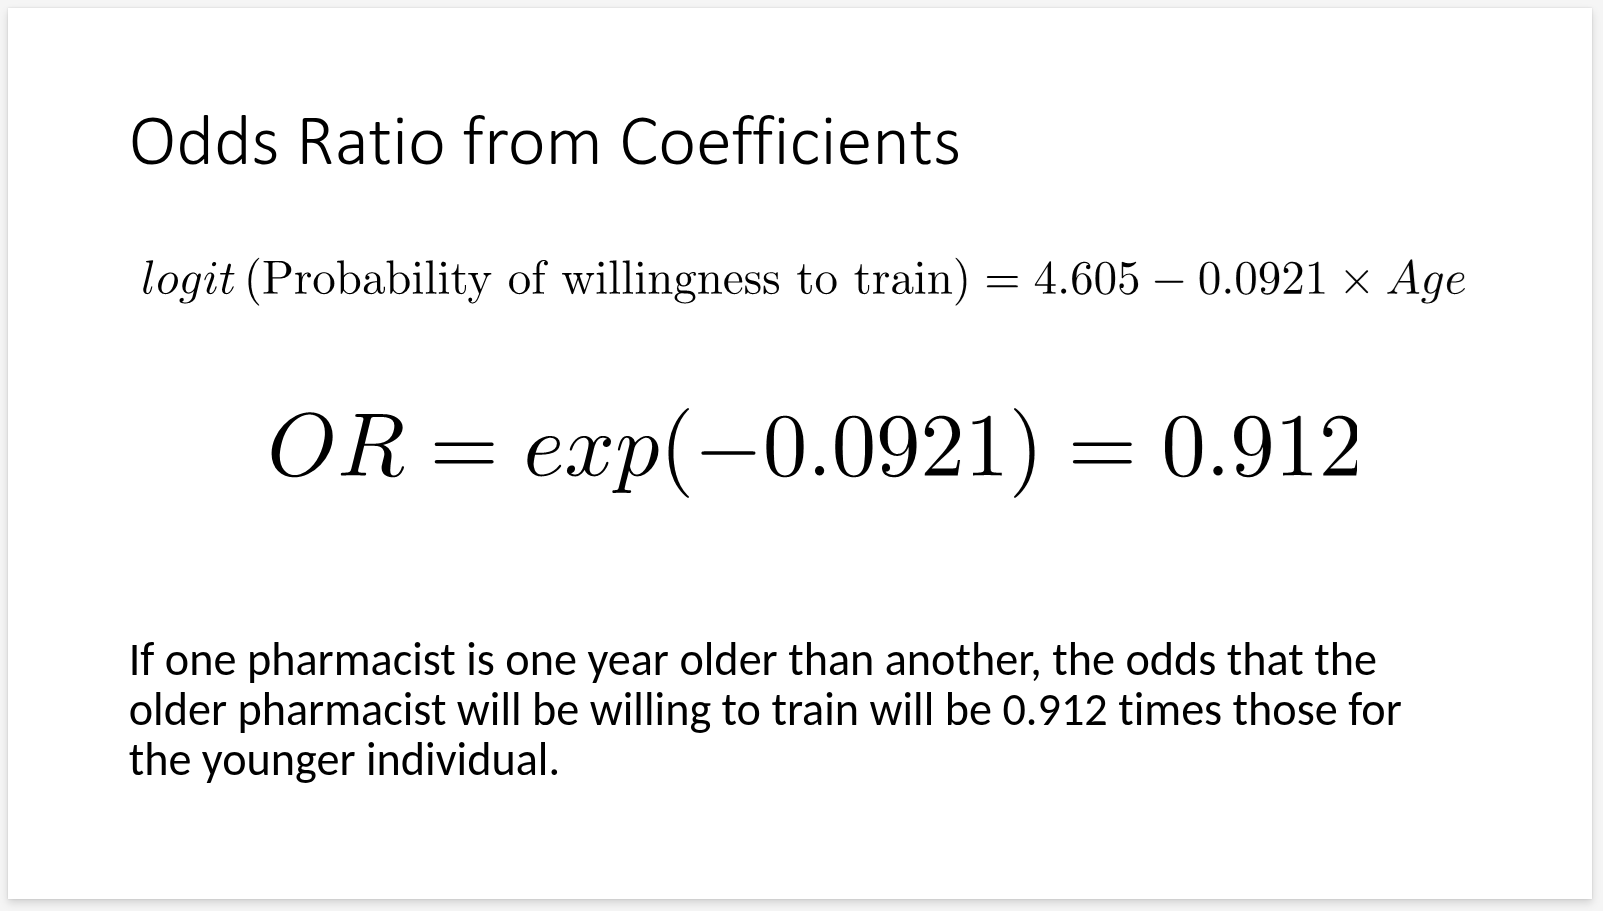

A questionnaire has been used to gather demographics data from some pharmacists, the data include their age and gender.

It also asked 'Would you personally be happy to provide training in the use of the App? (Yes/No)'

We are concerned with the influence of age on pharmacists' willingness to train patients in use of a phone App.

In [10]:
willing = pd.read_csv(f"{wd}AgeWould_Train.csv")

In [11]:
willing.shape

(236, 3)

In [12]:
willing.head()

Age Gender  Would_train
0   44      F            1
1   25      F            1
2   30      M            1
3   27      F            1
4   26      F            1

In [13]:
# Display first 10 observations
willing.head(10)

Age Gender  Would_train
0   44      F            1
1   25      F            1
2   30      M            1
3   27      F            1
4   26      F            1
5   46      M            0
6   33      F            1
7   43      F            0
8   30      F            1
9   59      M            1

In [14]:
# Fit logistic regression model
log_mod = logit("Would_train ~ Age + Gender", data=willing).fit()
print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.529116
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Would_train   No. Observations:                  236
Model:                          Logit   Df Residuals:                      233
Method:                           MLE   Df Model:                            2
Date:                Mon, 03 Nov 2025   Pseudo R-squ.:                  0.2064
Time:                        17:41:52   Log-Likelihood:                -124.87
converged:                       True   LL-Null:                       -157.35
Covariance Type:            nonrobust   LLR p-value:                 7.850e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.6057      0.628      7.331      0.000       3.374       5.837
Gender[T.M]    -0.0101    

In [15]:
# Get odds ratios and their confidence intervals
# Exponentiate the coefficients to get odds ratios
odds_ratios = np.exp(log_mod.params)
conf_int = np.exp(log_mod.conf_int())
conf_int.columns = ["2.5%", "97.5%"]

# Combine into a DataFrame
odds_table = pd.DataFrame(
    {"Odds Ratio": odds_ratios, "2.5%": conf_int["2.5%"], "97.5%": conf_int["97.5%"]}
)
odds_table

Odds Ratio       2.5%       97.5%
Intercept    100.050398  29.203052  342.775201
Gender[T.M]    0.989949   0.526699    1.860646
Age            0.912078   0.887871    0.936944

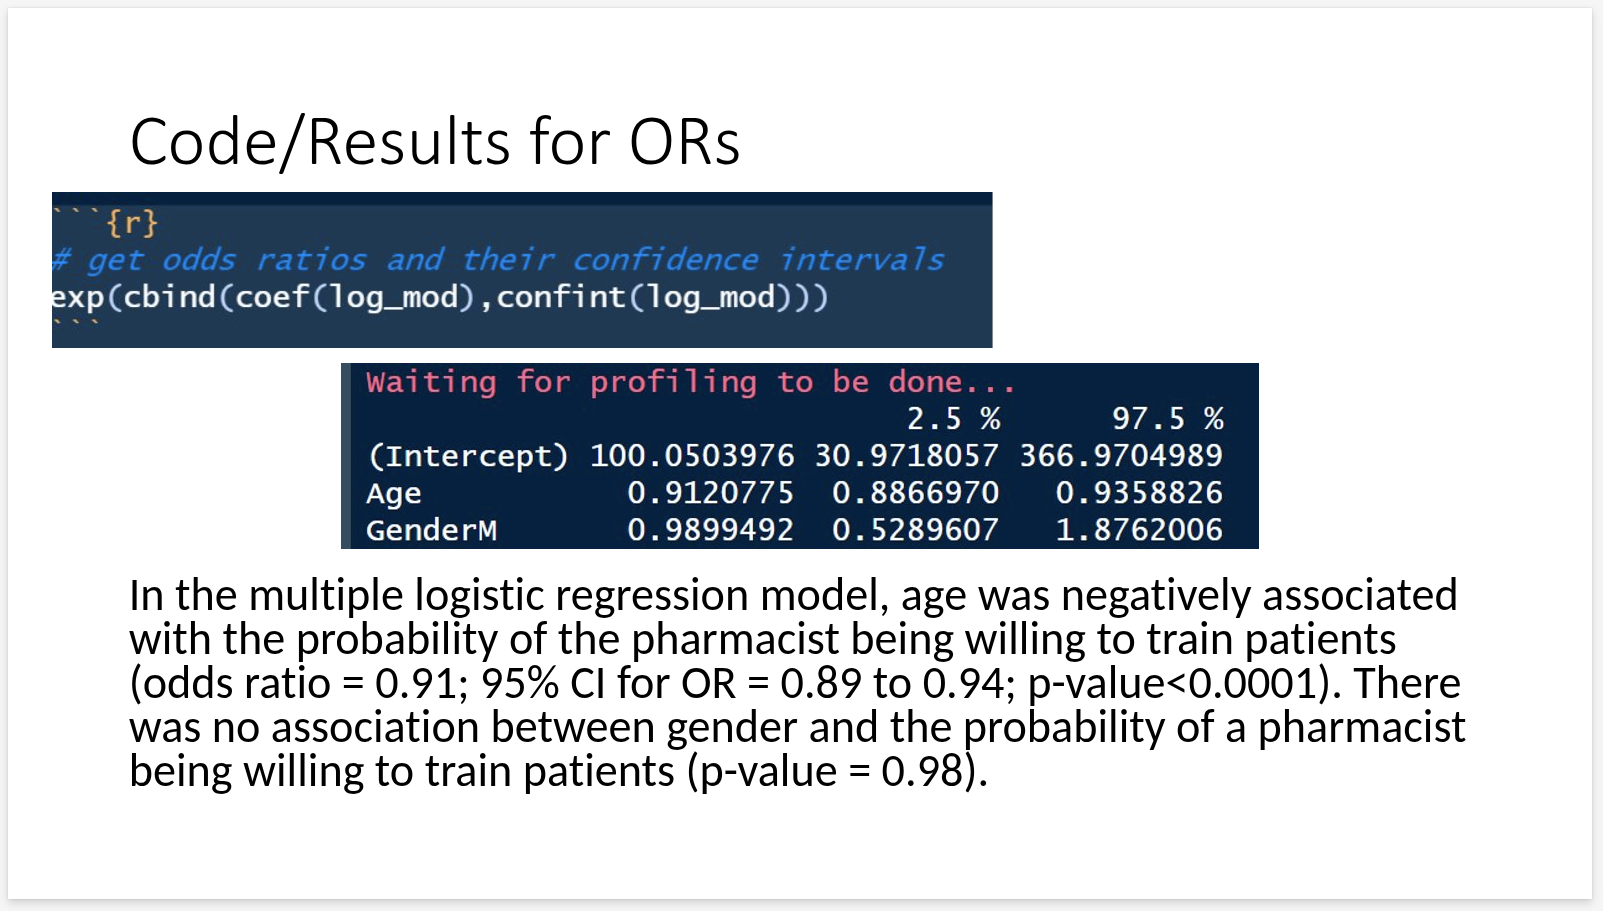